# Building Energy Efficiency Prediction - Linear Regression Analysis

## Project Overview
This notebook implements linear regression models (Linear, Ridge, Lasso, ElasticNet) to predict both heating load and cooling load of buildings based on architectural features.

## Motivation

### Why Building Energy Efficiency Matters?

Building energy efficiency is one of the most critical challenges in sustainable development and urban planning:

**1. Economic Benefits**
- **Cost Reduction:** Lower heating and cooling costs can save thousands of dollars annually
- **Property Value:** Energy-efficient buildings have higher market value
- **Operating Expenses:** Reduce long-term building maintenance and utility costs
- **Return on Investment:** Energy-efficient design pays off over building lifetime

**2. Environmental Impact**
- **Carbon Footprint:** Buildings account for 40% of global energy consumption
- **Climate Change:** Reducing building energy use is crucial for meeting climate goals
- **Resource Conservation:** Lower energy demand reduces strain on natural resources
- **Sustainable Development:** Essential for creating eco-friendly cities

**3. Design and Planning**
- **Architectural Decisions:** Help architects design more efficient buildings
- **Building Codes:** Inform policy makers about effective building standards
- **Urban Planning:** Guide sustainable city development strategies
- **Retrofit Planning:** Identify which building modifications have highest impact

**4. Occupant Comfort**
- **Temperature Control:** Optimize heating/cooling for comfort while saving energy
- **Indoor Environment:** Better predictions lead to improved indoor air quality
- **Seasonal Adaptation:** Plan for different climate conditions throughout the year

### Problem Definition

**Objective:** Predict both heating load and cooling load requirements for residential buildings

**Input Features (8 Architectural Characteristics):**
- **Relative Compactness:** Building shape efficiency
- **Surface Area:** Total external surface area (m²)
- **Wall Area:** Total wall area (m²)
- **Roof Area:** Total roof area (m²)
- **Overall Height:** Building height (m)
- **Orientation:** Building orientation (2, 3, 4, 5)
- **Glazing Area:** Window area ratio (0%, 10%, 25%, 40%)
- **Glazing Area Distribution:** Window distribution pattern

**Target Variables:**
- **Heating Load:** Energy required to heat the building
- **Cooling Load:** Energy required to cool the building

**Why This Analysis Matters:**

This study enables data-driven insights for:
- **Architects:** Design buildings with optimal energy efficiency from the start
- **Engineers:** Calculate accurate HVAC system requirements
- **Property Developers:** Make informed decisions about building specifications
- **Policy Makers:** Develop evidence-based building energy codes
- **Homeowners:** Understand how building features affect energy costs

By accurately predicting heating and cooling loads based on building characteristics, we can create more sustainable, cost-effective, and comfortable living spaces while significantly reducing environmental impact.

---

## Dataset Description

**Dataset Name:** Energy Efficiency Dataset (ENB2012)

**Source:** UCI Machine Learning Repository

**Number of Samples:** 768 instances

**Number of Features:** 8 input variables + 2 target variables

### Feature Details:

| Variable Name | Role | Type | Description | Units/Values | Range | Missing Values |
|---------------|------|------|-------------|--------------|-------|----------------|
| Relative Compactness | Feature | Continuous | Surface area to volume ratio | Dimensionless | 0.62-0.98 | No |
| Surface Area | Feature | Continuous | Total building envelope area | m² | 514.5-808.5 | No |
| Wall Area | Feature | Continuous | Total external wall area | m² | 245-416.5 | No |
| Roof Area | Feature | Continuous | Total roof area | m² | 110.25-220.5 | No |
| Overall Height | Feature | Continuous | Building height | m | 3.5, 7.0 | No |
| Orientation | Feature | Categorical | Compass direction | 2, 3, 4, 5 | 2-5 | No |
| Glazing Area | Feature | Continuous | Window area as % of floor area | % | 0, 0.1, 0.25, 0.4 | No |
| Glazing Area Distribution | Feature | Categorical | Window distribution pattern | 0-5 | 0-5 | No |
| **Heating Load** | **Target** | **Continuous** | **Energy for heating** | **kWh/m²** | **6.01-43.1** | **No** |
| **Cooling Load** | **Target** | **Continuous** | **Energy for cooling** | **kWh/m²** | **10.9-48.03** | **No** |

### Dataset Characteristics:
- **Complete Dataset:** No missing values
- **Simulated Data:** Generated using Ecotect energy simulation software
- **Systematic Design:** 12 different building shapes simulated
- **Parametric Study:** Various combinations of architectural parameters
- **Dual Targets:** Both heating and cooling loads predicted simultaneously

### Building Specifications:
- **Type:** Residential buildings
- **Climate:** Not specified (generic analysis)
- **Design Variables:** 8 architectural features
- **Orientation Values:**
  - 2 = North
  - 3 = East
  - 4 = South
  - 5 = West

### Glazing Area Distribution:
- **0:** No glazing
- **1:** Uniform (25% on each side)
- **2:** North (55% on north side)
- **3:** East (55% on east side)
- **4:** South (55% on south side)
- **5:** West (55% on west side)

### Key Statistics:
- **Mean Heating Load:** ~22.3 kWh/m²
- **Mean Cooling Load:** ~24.6 kWh/m²
- **Building Height:** 2 levels (3.5m or 7.0m)
- **Surface Area Variation:** ~300 m² range

### Application Areas:
- Building energy simulation and optimization
- Architectural design decision support
- Building energy code development
- HVAC system sizing and design
- Sustainable building certification (LEED, BREEAM)

## 1. Import Libraries and Load Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import warnings
warnings.filterwarnings('ignore')

sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)

df = pd.read_csv(r'../data_set/ENB2012_data.csv')

print("Dataset Shape:", df.shape)
print("\nFirst few rows:")
print(df.head())
print("\nDataset Info:")
print(df.info())
print("\nBasic Statistics:")
print(df.describe())

Dataset Shape: (768, 10)

First few rows:
   Relative Compactness  Surface Area  Wall Area  Roof Area  Overall Height  \
0                  0.98         514.5      294.0     110.25             7.0   
1                  0.98         514.5      294.0     110.25             7.0   
2                  0.98         514.5      294.0     110.25             7.0   
3                  0.98         514.5      294.0     110.25             7.0   
4                  0.90         563.5      318.5     122.50             7.0   

   Orientation  Glazing Area  Glazing Area Distribution  Heating Load  \
0            2           0.0                          0         15.55   
1            3           0.0                          0         15.55   
2            4           0.0                          0         15.55   
3            5           0.0                          0         15.55   
4            2           0.0                          0         20.84   

   Cooling Load  
0         21.33  
1       

## 2. Data Preprocessing

In [2]:
# Check for missing values and duplicates
print("Column Names:", df.columns.tolist())
print("\nMissing Values:")
print(df.isnull().sum())
print(f"\nNumber of duplicate rows: {df.duplicated().sum()}")

# Prepare features and targets
X = df.drop(['Heating Load', 'Cooling Load'], axis=1)
y_heating = df['Heating Load']
y_cooling = df['Cooling Load']

print(f"\nFeatures: {X.columns.tolist()}")
print(f"Target Variables: Heating Load, Cooling Load")

# Split data for both targets
X_train, X_test, y_heating_train, y_heating_test = train_test_split(
    X, y_heating, test_size=0.2, random_state=42)
_, _, y_cooling_train, y_cooling_test = train_test_split(
    X, y_cooling, test_size=0.2, random_state=42)

print(f"\nTraining set size: {X_train.shape[0]} samples")
print(f"Testing set size: {X_test.shape[0]} samples")

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Column Names: ['Relative Compactness', 'Surface Area', 'Wall Area', 'Roof Area', 'Overall Height', 'Orientation', 'Glazing Area', 'Glazing Area Distribution', 'Heating Load', 'Cooling Load']

Missing Values:
Relative Compactness         0
Surface Area                 0
Wall Area                    0
Roof Area                    0
Overall Height               0
Orientation                  0
Glazing Area                 0
Glazing Area Distribution    0
Heating Load                 0
Cooling Load                 0
dtype: int64

Number of duplicate rows: 0

Features: ['Relative Compactness', 'Surface Area', 'Wall Area', 'Roof Area', 'Overall Height', 'Orientation', 'Glazing Area', 'Glazing Area Distribution']
Target Variables: Heating Load, Cooling Load

Training set size: 614 samples
Testing set size: 154 samples


## 3. Build Linear Regression Models for Both Targets

In [3]:
models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(alpha=1.0, random_state=42),
    'Lasso Regression': Lasso(alpha=0.1, random_state=42),
    'ElasticNet': ElasticNet(alpha=0.1, l1_ratio=0.5, random_state=42)
}

# Train models for Heating Load
trained_models_heating = {}
predictions_heating = {}

print("Training models for Heating Load...")
for name, model in models.items():
    model_instance = type(model)(**model.get_params()) if hasattr(model, 'get_params') else model
    model_instance.fit(X_train_scaled, y_heating_train)
    y_pred = model_instance.predict(X_test_scaled)
    
    trained_models_heating[name] = model_instance
    predictions_heating[name] = y_pred

# Train models for Cooling Load
trained_models_cooling = {}
predictions_cooling = {}

print("Training models for Cooling Load...")
for name in models.keys():
    if name == 'Linear Regression':
        model_instance = LinearRegression()
    elif name == 'Ridge Regression':
        model_instance = Ridge(alpha=1.0, random_state=42)
    elif name == 'Lasso Regression':
        model_instance = Lasso(alpha=0.1, random_state=42)
    elif name == 'ElasticNet':
        model_instance = ElasticNet(alpha=0.1, l1_ratio=0.5, random_state=42)
    
    model_instance.fit(X_train_scaled, y_cooling_train)
    y_pred = model_instance.predict(X_test_scaled)
    
    trained_models_cooling[name] = model_instance
    predictions_cooling[name] = y_pred

print("\nModel training completed!")

Training models for Heating Load...
Training models for Cooling Load...

Model training completed!


## 4. Model Evaluation - Regression Metrics

In [4]:
# Evaluate Heating Load models
results_heating = []

for name, y_pred in predictions_heating.items():
    mae = mean_absolute_error(y_heating_test, y_pred)
    mse = mean_squared_error(y_heating_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_heating_test, y_pred)
    
    n = len(y_heating_test)
    p = X_test.shape[1]
    adj_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)
    mape = np.mean(np.abs((y_heating_test - y_pred) / y_heating_test)) * 100
    
    results_heating.append({
        'Model': name,
        'MAE': mae,
        'MSE': mse,
        'RMSE': rmse,
        'R²': r2,
        'Adjusted R²': adj_r2,
        'MAPE (%)': mape
    })

results_heating_df = pd.DataFrame(results_heating)
results_heating_df = results_heating_df.sort_values('R²', ascending=False).reset_index(drop=True)

# Evaluate Cooling Load models
results_cooling = []

for name, y_pred in predictions_cooling.items():
    mae = mean_absolute_error(y_cooling_test, y_pred)
    mse = mean_squared_error(y_cooling_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_cooling_test, y_pred)
    
    n = len(y_cooling_test)
    p = X_test.shape[1]
    adj_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)
    mape = np.mean(np.abs((y_cooling_test - y_pred) / y_cooling_test)) * 100
    
    results_cooling.append({
        'Model': name,
        'MAE': mae,
        'MSE': mse,
        'RMSE': rmse,
        'R²': r2,
        'Adjusted R²': adj_r2,
        'MAPE (%)': mape
    })

results_cooling_df = pd.DataFrame(results_cooling)
results_cooling_df = results_cooling_df.sort_values('R²', ascending=False).reset_index(drop=True)

print("=" * 100)
print("HEATING LOAD - MODEL EVALUATION METRICS")
print("=" * 100)
print(results_heating_df.to_string(index=False))
print("=" * 100)

print("\n" + "=" * 100)
print("COOLING LOAD - MODEL EVALUATION METRICS")
print("=" * 100)
print(results_cooling_df.to_string(index=False))
print("=" * 100)

HEATING LOAD - MODEL EVALUATION METRICS
            Model      MAE       MSE     RMSE       R²  Adjusted R²  MAPE (%)
Linear Regression 2.182047  9.153188 3.025424 0.912184     0.907339 10.258458
 Ridge Regression 2.190753  9.213829 3.035429 0.911602     0.906725 10.346313
 Lasso Regression 2.294451  9.938747 3.152578 0.904647     0.899387 10.906983
       ElasticNet 2.325438 10.828473 3.290665 0.896111     0.890380 10.844244

COOLING LOAD - MODEL EVALUATION METRICS
            Model      MAE       MSE     RMSE       R²  Adjusted R²  MAPE (%)
Linear Regression 2.195295  9.893428 3.145382 0.893226     0.887335  8.478724
 Ridge Regression 2.195886  9.937175 3.152329 0.892753     0.886836  8.545861
 Lasso Regression 2.305143 10.756722 3.279744 0.883908     0.877503  9.104869
       ElasticNet 2.416633 12.117648 3.481041 0.869221     0.862005  9.363124


## 5. Performance Comparison Visualization

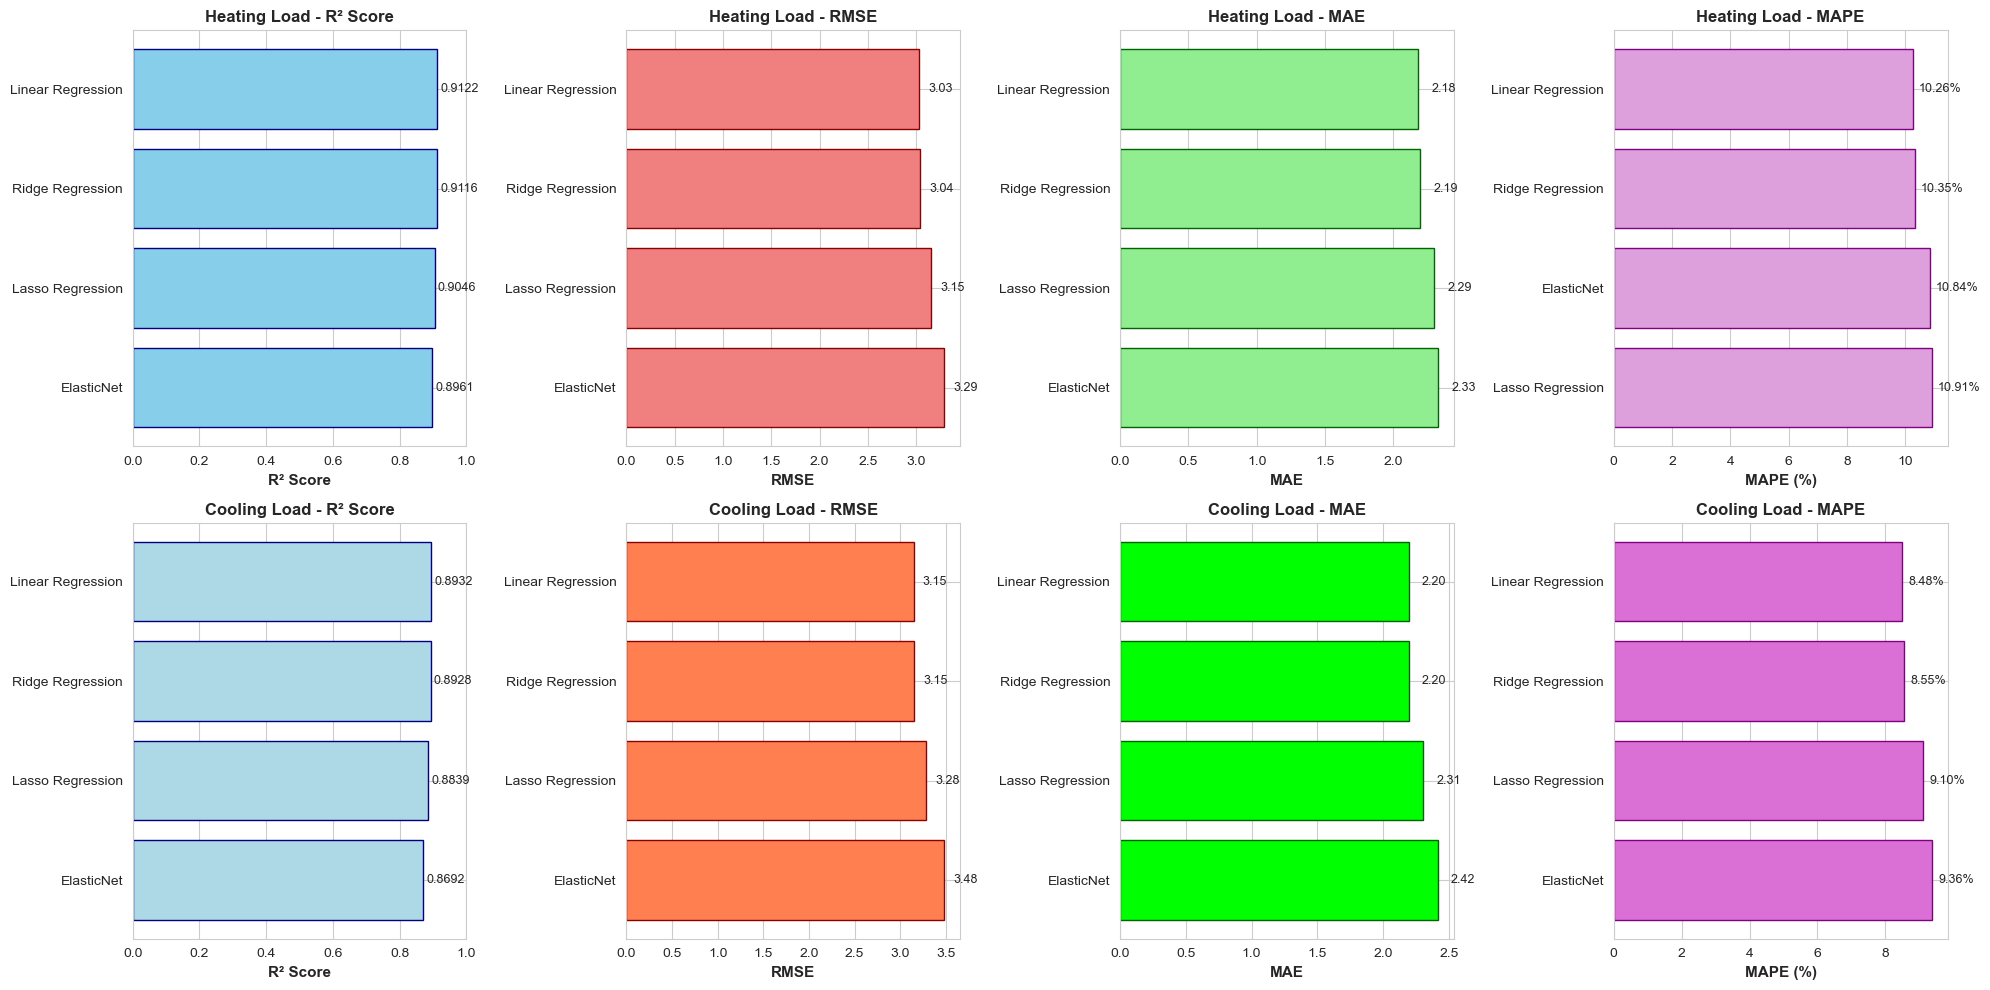


Best model for Heating Load: Linear Regression
Best model for Cooling Load: Linear Regression


In [5]:
fig, axes = plt.subplots(2, 4, figsize=(20, 10))

# Heating Load plots
ax1 = axes[0, 0]
sorted_r2 = results_heating_df.sort_values('R²')
bars1 = ax1.barh(sorted_r2['Model'], sorted_r2['R²'], color='skyblue', edgecolor='navy')
ax1.set_xlabel('R² Score', fontsize=11, fontweight='bold')
ax1.set_title('Heating Load - R² Score', fontsize=12, fontweight='bold')
ax1.set_xlim(0, 1)
for i, bar in enumerate(bars1):
    width = bar.get_width()
    ax1.text(width + 0.01, bar.get_y() + bar.get_height()/2, 
             f'{width:.4f}', ha='left', va='center', fontsize=9)

ax2 = axes[0, 1]
sorted_rmse = results_heating_df.sort_values('RMSE', ascending=False)
bars2 = ax2.barh(sorted_rmse['Model'], sorted_rmse['RMSE'], color='lightcoral', edgecolor='darkred')
ax2.set_xlabel('RMSE', fontsize=11, fontweight='bold')
ax2.set_title('Heating Load - RMSE', fontsize=12, fontweight='bold')
for i, bar in enumerate(bars2):
    width = bar.get_width()
    ax2.text(width + 0.1, bar.get_y() + bar.get_height()/2, 
             f'{width:.2f}', ha='left', va='center', fontsize=9)

ax3 = axes[0, 2]
sorted_mae = results_heating_df.sort_values('MAE', ascending=False)
bars3 = ax3.barh(sorted_mae['Model'], sorted_mae['MAE'], color='lightgreen', edgecolor='darkgreen')
ax3.set_xlabel('MAE', fontsize=11, fontweight='bold')
ax3.set_title('Heating Load - MAE', fontsize=12, fontweight='bold')
for i, bar in enumerate(bars3):
    width = bar.get_width()
    ax3.text(width + 0.1, bar.get_y() + bar.get_height()/2, 
             f'{width:.2f}', ha='left', va='center', fontsize=9)

ax4 = axes[0, 3]
sorted_mape = results_heating_df.sort_values('MAPE (%)', ascending=False)
bars4 = ax4.barh(sorted_mape['Model'], sorted_mape['MAPE (%)'], color='plum', edgecolor='purple')
ax4.set_xlabel('MAPE (%)', fontsize=11, fontweight='bold')
ax4.set_title('Heating Load - MAPE', fontsize=12, fontweight='bold')
for i, bar in enumerate(bars4):
    width = bar.get_width()
    ax4.text(width + 0.2, bar.get_y() + bar.get_height()/2, 
             f'{width:.2f}%', ha='left', va='center', fontsize=9)

# Cooling Load plots
ax5 = axes[1, 0]
sorted_r2 = results_cooling_df.sort_values('R²')
bars5 = ax5.barh(sorted_r2['Model'], sorted_r2['R²'], color='lightblue', edgecolor='navy')
ax5.set_xlabel('R² Score', fontsize=11, fontweight='bold')
ax5.set_title('Cooling Load - R² Score', fontsize=12, fontweight='bold')
ax5.set_xlim(0, 1)
for i, bar in enumerate(bars5):
    width = bar.get_width()
    ax5.text(width + 0.01, bar.get_y() + bar.get_height()/2, 
             f'{width:.4f}', ha='left', va='center', fontsize=9)

ax6 = axes[1, 1]
sorted_rmse = results_cooling_df.sort_values('RMSE', ascending=False)
bars6 = ax6.barh(sorted_rmse['Model'], sorted_rmse['RMSE'], color='coral', edgecolor='darkred')
ax6.set_xlabel('RMSE', fontsize=11, fontweight='bold')
ax6.set_title('Cooling Load - RMSE', fontsize=12, fontweight='bold')
for i, bar in enumerate(bars6):
    width = bar.get_width()
    ax6.text(width + 0.1, bar.get_y() + bar.get_height()/2, 
             f'{width:.2f}', ha='left', va='center', fontsize=9)

ax7 = axes[1, 2]
sorted_mae = results_cooling_df.sort_values('MAE', ascending=False)
bars7 = ax7.barh(sorted_mae['Model'], sorted_mae['MAE'], color='lime', edgecolor='darkgreen')
ax7.set_xlabel('MAE', fontsize=11, fontweight='bold')
ax7.set_title('Cooling Load - MAE', fontsize=12, fontweight='bold')
for i, bar in enumerate(bars7):
    width = bar.get_width()
    ax7.text(width + 0.1, bar.get_y() + bar.get_height()/2, 
             f'{width:.2f}', ha='left', va='center', fontsize=9)

ax8 = axes[1, 3]
sorted_mape = results_cooling_df.sort_values('MAPE (%)', ascending=False)
bars8 = ax8.barh(sorted_mape['Model'], sorted_mape['MAPE (%)'], color='orchid', edgecolor='purple')
ax8.set_xlabel('MAPE (%)', fontsize=11, fontweight='bold')
ax8.set_title('Cooling Load - MAPE', fontsize=12, fontweight='bold')
for i, bar in enumerate(bars8):
    width = bar.get_width()
    ax8.text(width + 0.2, bar.get_y() + bar.get_height()/2, 
             f'{width:.2f}%', ha='left', va='center', fontsize=9)

plt.tight_layout()
plt.show()

best_model_heating = results_heating_df.iloc[0]['Model']
best_model_cooling = results_cooling_df.iloc[0]['Model']
print(f"\nBest model for Heating Load: {best_model_heating}")
print(f"Best model for Cooling Load: {best_model_cooling}")

## 6. Predicted vs Actual Values Visualization

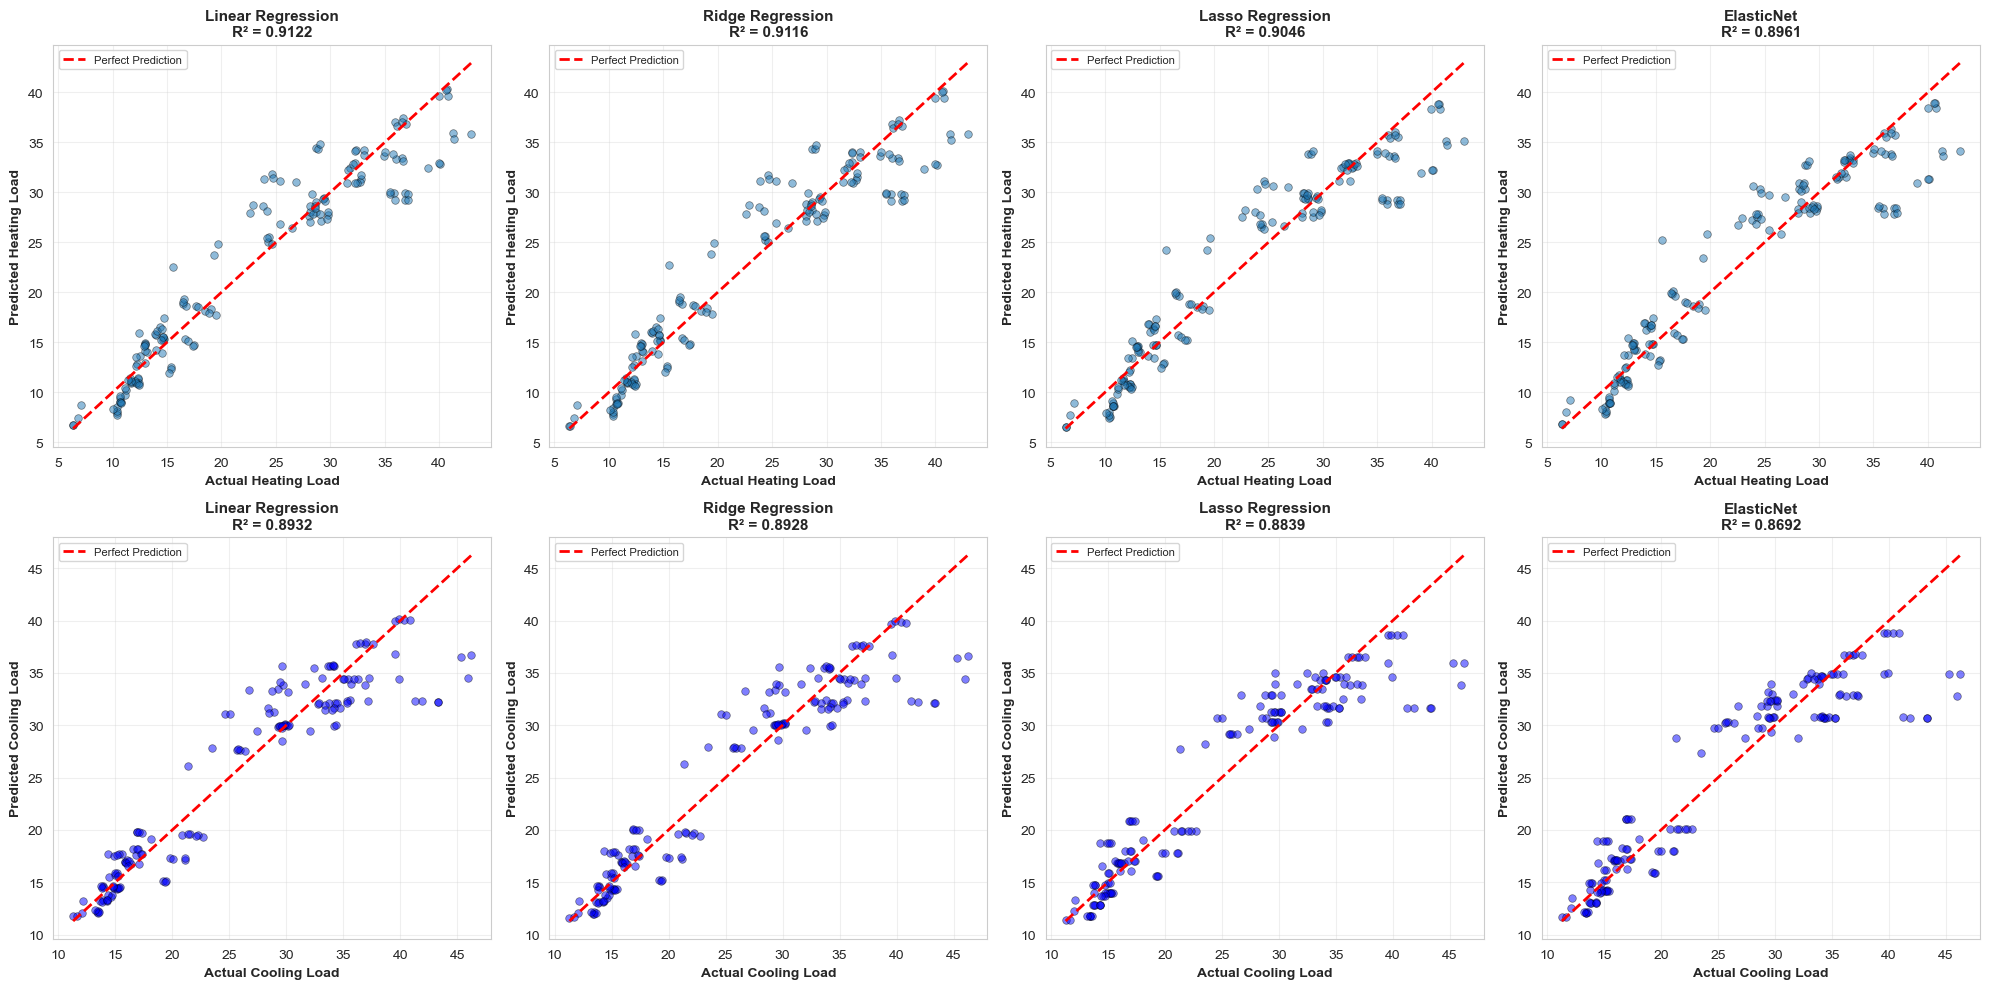

In [6]:
fig, axes = plt.subplots(2, 4, figsize=(20, 10))

# Heating Load predictions
for idx, (name, y_pred) in enumerate(predictions_heating.items()):
    ax = axes[0, idx]
    ax.scatter(y_heating_test, y_pred, alpha=0.5, s=30, edgecolors='k', linewidth=0.5)
    
    min_val = min(y_heating_test.min(), y_pred.min())
    max_val = max(y_heating_test.max(), y_pred.max())
    ax.plot([min_val, max_val], [min_val, max_val], 'r--', lw=2, label='Perfect Prediction')
    
    ax.set_xlabel('Actual Heating Load', fontsize=10, fontweight='bold')
    ax.set_ylabel('Predicted Heating Load', fontsize=10, fontweight='bold')
    r2_val = results_heating_df[results_heating_df["Model"]==name]["R²"].values[0]
    ax.set_title(f'{name}\nR² = {r2_val:.4f}', fontsize=11, fontweight='bold')
    ax.legend(fontsize=8)
    ax.grid(True, alpha=0.3)

# Cooling Load predictions
for idx, (name, y_pred) in enumerate(predictions_cooling.items()):
    ax = axes[1, idx]
    ax.scatter(y_cooling_test, y_pred, alpha=0.5, s=30, edgecolors='k', linewidth=0.5, c='blue')
    
    min_val = min(y_cooling_test.min(), y_pred.min())
    max_val = max(y_cooling_test.max(), y_pred.max())
    ax.plot([min_val, max_val], [min_val, max_val], 'r--', lw=2, label='Perfect Prediction')
    
    ax.set_xlabel('Actual Cooling Load', fontsize=10, fontweight='bold')
    ax.set_ylabel('Predicted Cooling Load', fontsize=10, fontweight='bold')
    r2_val = results_cooling_df[results_cooling_df["Model"]==name]["R²"].values[0]
    ax.set_title(f'{name}\nR² = {r2_val:.4f}', fontsize=11, fontweight='bold')
    ax.legend(fontsize=8)
    ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

## 7. Residual Analysis

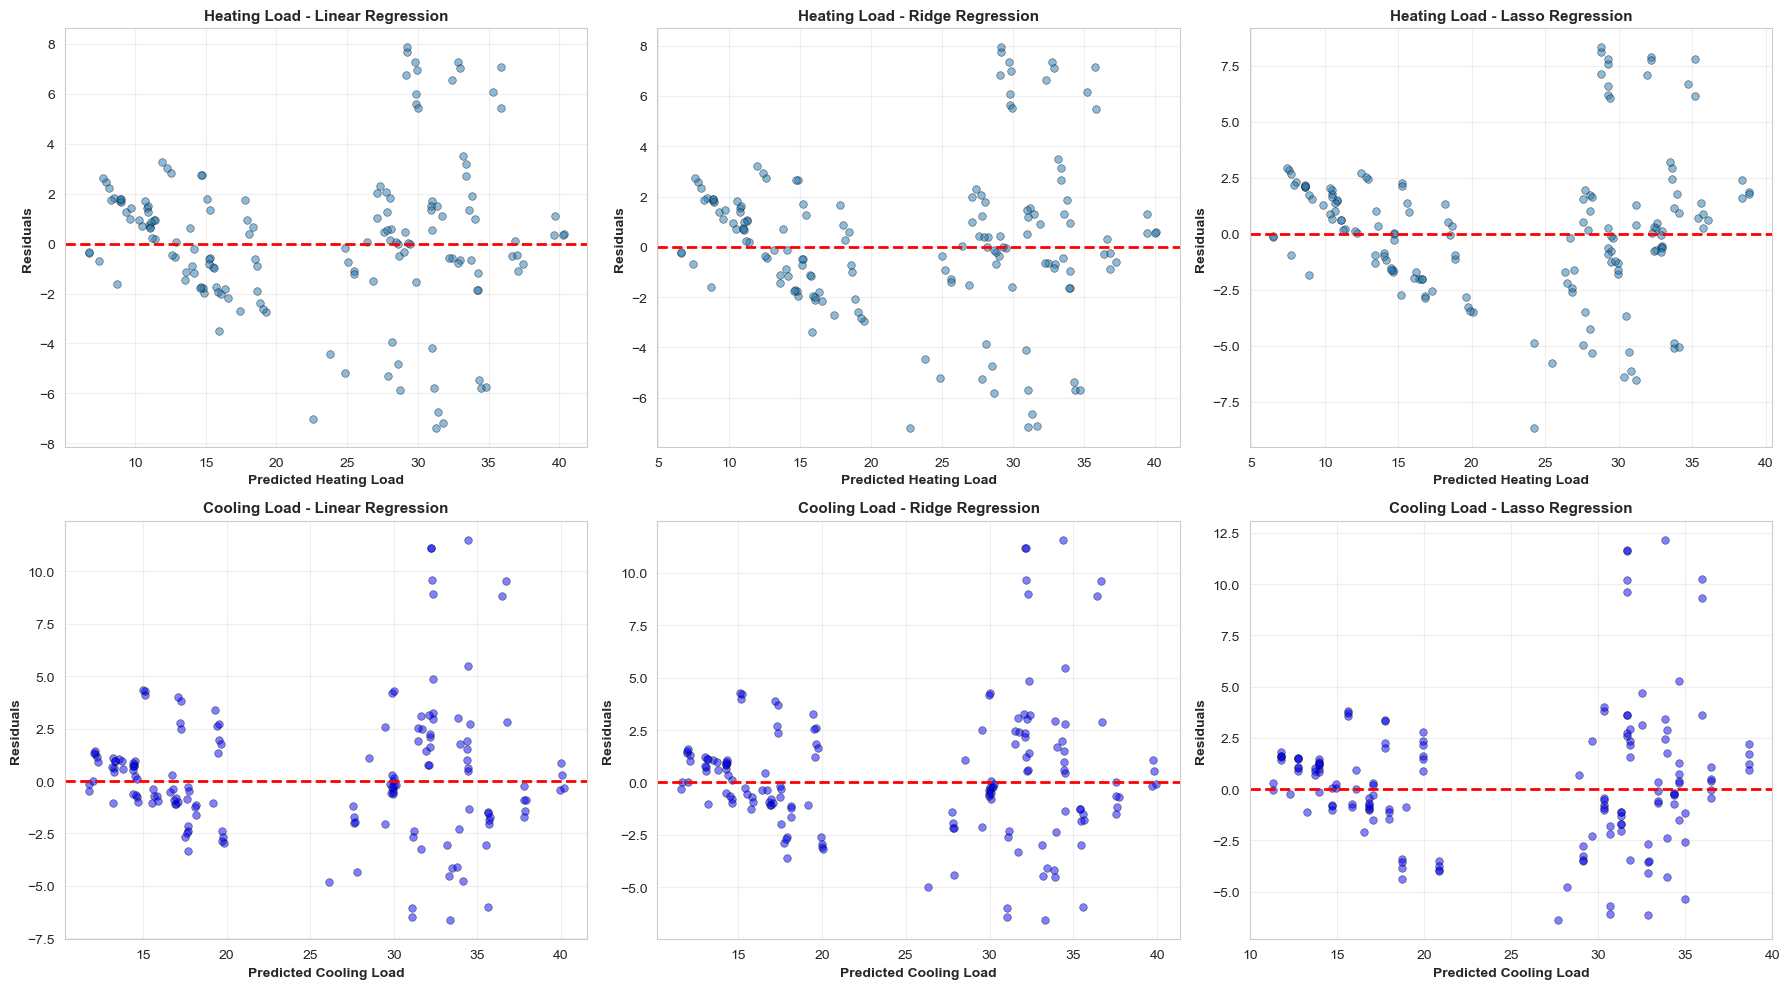

In [7]:
top_models_heating = results_heating_df.head(3)['Model'].tolist()
top_models_cooling = results_cooling_df.head(3)['Model'].tolist()

fig, axes = plt.subplots(2, 3, figsize=(18, 10))

# Heating Load residuals
for idx, model_name in enumerate(top_models_heating):
    ax = axes[0, idx]
    y_pred = predictions_heating[model_name]
    residuals = y_heating_test - y_pred
    
    ax.scatter(y_pred, residuals, alpha=0.5, s=30, edgecolors='k', linewidth=0.5)
    ax.axhline(y=0, color='r', linestyle='--', lw=2)
    ax.set_xlabel('Predicted Heating Load', fontsize=10, fontweight='bold')
    ax.set_ylabel('Residuals', fontsize=10, fontweight='bold')
    ax.set_title(f'Heating Load - {model_name}', fontsize=11, fontweight='bold')
    ax.grid(True, alpha=0.3)

# Cooling Load residuals
for idx, model_name in enumerate(top_models_cooling):
    ax = axes[1, idx]
    y_pred = predictions_cooling[model_name]
    residuals = y_cooling_test - y_pred
    
    ax.scatter(y_pred, residuals, alpha=0.5, s=30, edgecolors='k', linewidth=0.5, c='blue')
    ax.axhline(y=0, color='r', linestyle='--', lw=2)
    ax.set_xlabel('Predicted Cooling Load', fontsize=10, fontweight='bold')
    ax.set_ylabel('Residuals', fontsize=10, fontweight='bold')
    ax.set_title(f'Cooling Load - {model_name}', fontsize=11, fontweight='bold')
    ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

## 9. Coefficients Analysis (for Linear Models)

HEATING LOAD - COEFFICIENTS FOR LINEAR MODELS (Standardized)
                           Linear Regression  Ridge Regression  Lasso Regression  ElasticNet
Relative Compactness               -6.517601         -5.375465         -0.000921   -0.159893
Surface Area                       -3.604586         -2.848519          0.000000   -0.453506
Wall Area                           0.795339          0.991635          2.160617    2.254037
Roof Area                          -3.917367         -3.270694         -0.000000   -1.987011
Overall Height                      7.215464          7.481422          8.247621    5.792476
Orientation                        -0.035934         -0.035679         -0.000000   -0.003910
Glazing Area                        2.700051          2.699230          2.635757    2.549531
Glazing Area Distribution           0.327345          0.328687          0.247242    0.291150

COOLING LOAD - COEFFICIENTS FOR LINEAR MODELS (Standardized)
                           Linear Regres

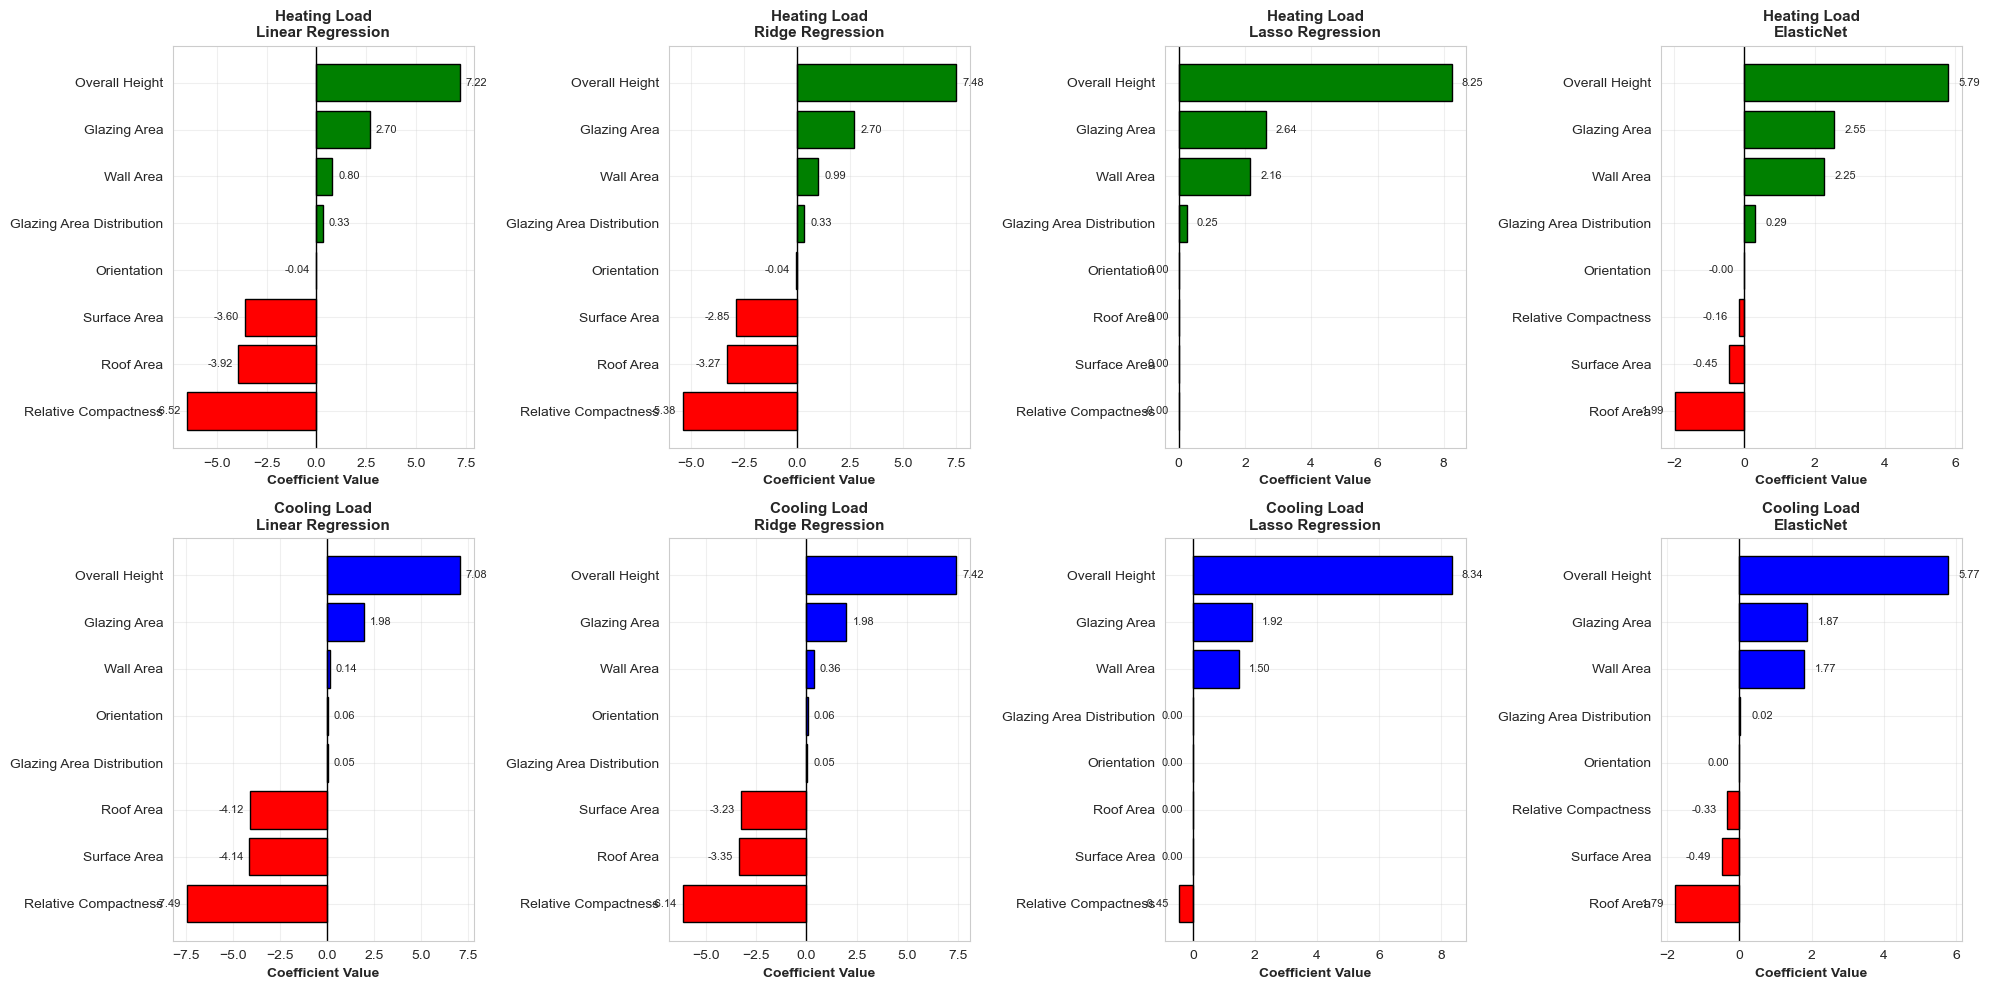

In [8]:
linear_models_list = ['Linear Regression', 'Ridge Regression', 'Lasso Regression', 'ElasticNet']

# Heating Load coefficients
coef_data_heating = []
for model_name in linear_models_list:
    model = trained_models_heating[model_name]
    coef_data_heating.append(model.coef_)

coef_df_heating = pd.DataFrame(coef_data_heating, columns=X.columns, index=linear_models_list)

# Cooling Load coefficients
coef_data_cooling = []
for model_name in linear_models_list:
    model = trained_models_cooling[model_name]
    coef_data_cooling.append(model.coef_)

coef_df_cooling = pd.DataFrame(coef_data_cooling, columns=X.columns, index=linear_models_list)

print("=" * 100)
print("HEATING LOAD - COEFFICIENTS FOR LINEAR MODELS (Standardized)")
print("=" * 100)
print(coef_df_heating.T.to_string())
print("=" * 100)

print("\n" + "=" * 100)
print("COOLING LOAD - COEFFICIENTS FOR LINEAR MODELS (Standardized)")
print("=" * 100)
print(coef_df_cooling.T.to_string())
print("=" * 100)

fig, axes = plt.subplots(2, 4, figsize=(20, 10))

# Heating Load coefficients
for idx, model_name in enumerate(linear_models_list):
    ax = axes[0, idx]
    coefs = coef_df_heating.loc[model_name].sort_values()
    colors = ['red' if x < 0 else 'green' for x in coefs]
    
    bars = ax.barh(coefs.index, coefs.values, color=colors, edgecolor='black')
    ax.set_xlabel('Coefficient Value', fontsize=10, fontweight='bold')
    ax.set_title(f'Heating Load\n{model_name}', fontsize=11, fontweight='bold')
    ax.axvline(x=0, color='black', linestyle='-', linewidth=1)
    ax.grid(True, alpha=0.3)
    
    for i, bar in enumerate(bars):
        width = bar.get_width()
        offset = 0.3 if width > 0 else -0.3
        ax.text(width + offset, bar.get_y() + bar.get_height()/2, 
                f'{width:.2f}', ha='left' if width > 0 else 'right', 
                va='center', fontsize=8)

# Cooling Load coefficients
for idx, model_name in enumerate(linear_models_list):
    ax = axes[1, idx]
    coefs = coef_df_cooling.loc[model_name].sort_values()
    colors = ['red' if x < 0 else 'blue' for x in coefs]
    
    bars = ax.barh(coefs.index, coefs.values, color=colors, edgecolor='black')
    ax.set_xlabel('Coefficient Value', fontsize=10, fontweight='bold')
    ax.set_title(f'Cooling Load\n{model_name}', fontsize=11, fontweight='bold')
    ax.axvline(x=0, color='black', linestyle='-', linewidth=1)
    ax.grid(True, alpha=0.3)
    
    for i, bar in enumerate(bars):
        width = bar.get_width()
        offset = 0.3 if width > 0 else -0.3
        ax.text(width + offset, bar.get_y() + bar.get_height()/2, 
                f'{width:.2f}', ha='left' if width > 0 else 'right', 
                va='center', fontsize=8)

plt.tight_layout()
plt.show()

## 10. Interpretation of Results

### 10.1 Model Performance Comparison

In [9]:
print("=" * 100)
print("COMPREHENSIVE MODEL INTERPRETATION")
print("=" * 100)

print("\n[HEATING LOAD MODELS]")
print("=" * 100)

best_heating = results_heating_df.iloc[0]
worst_heating = results_heating_df.iloc[-1]

print("\nPERFORMANCE RANKING:")
print("-" * 100)
for i, row in results_heating_df.iterrows():
    rank = f"[{i+1}]"
    print(f"{rank} {row['Model']:<25} | R²: {row['R²']:.4f} | RMSE: {row['RMSE']:.3f} | MAE: {row['MAE']:.3f}")

print("\n\nBEST MODEL ANALYSIS:")
print("-" * 100)
print(f"Model: {best_heating['Model']}")
print(f"  R² Score: {best_heating['R²']:.4f}")
print(f"    Explains {best_heating['R²']*100:.2f}% of variance in building heating load")
print(f"  RMSE: {best_heating['RMSE']:.3f}")
print(f"    Average prediction error magnitude")
print(f"  MAE: {best_heating['MAE']:.3f}")
print(f"    Average absolute prediction error")
print(f"  MAPE: {best_heating['MAPE (%)']:.2f}%")
print(f"    Average percentage error in predictions")

print("\n\n[COOLING LOAD MODELS]")
print("=" * 100)

best_cooling = results_cooling_df.iloc[0]
worst_cooling = results_cooling_df.iloc[-1]

print("\nPERFORMANCE RANKING:")
print("-" * 100)
for i, row in results_cooling_df.iterrows():
    rank = f"[{i+1}]"
    print(f"{rank} {row['Model']:<25} | R²: {row['R²']:.4f} | RMSE: {row['RMSE']:.3f} | MAE: {row['MAE']:.3f}")

print("\n\nBEST MODEL ANALYSIS:")
print("-" * 100)
print(f"Model: {best_cooling['Model']}")
print(f"  R² Score: {best_cooling['R²']:.4f}")
print(f"    Explains {best_cooling['R²']*100:.2f}% of variance in building cooling load")
print(f"  RMSE: {best_cooling['RMSE']:.3f}")
print(f"    Average prediction error magnitude")
print(f"  MAE: {best_cooling['MAE']:.3f}")
print(f"    Average absolute prediction error")
print(f"  MAPE: {best_cooling['MAPE (%)']:.2f}%")
print(f"    Average percentage error in predictions")

print("\n\nLINEAR MODELS COMPARISON:")
print("-" * 100)
linear_models_list = ['Linear Regression', 'Ridge Regression', 'Lasso Regression', 'ElasticNet']
heating_avg_r2 = results_heating_df[results_heating_df['Model'].isin(linear_models_list)]['R²'].mean()
cooling_avg_r2 = results_cooling_df[results_cooling_df['Model'].isin(linear_models_list)]['R²'].mean()

print(f"Heating Load - Linear Models Average R²: {heating_avg_r2:.4f}")
print(f"Cooling Load - Linear Models Average R²: {cooling_avg_r2:.4f}")
print("\nAll models use linear relationships to predict energy loads")
print("  - Ridge and Lasso add regularization to prevent overfitting")
print("  - ElasticNet combines Ridge and Lasso regularization")
print("  - Linear Regression is the baseline without regularization")

print("\n" + "=" * 100)

COMPREHENSIVE MODEL INTERPRETATION

[HEATING LOAD MODELS]

PERFORMANCE RANKING:
----------------------------------------------------------------------------------------------------
[1] Linear Regression         | R²: 0.9122 | RMSE: 3.025 | MAE: 2.182
[2] Ridge Regression          | R²: 0.9116 | RMSE: 3.035 | MAE: 2.191
[3] Lasso Regression          | R²: 0.9046 | RMSE: 3.153 | MAE: 2.294
[4] ElasticNet                | R²: 0.8961 | RMSE: 3.291 | MAE: 2.325


BEST MODEL ANALYSIS:
----------------------------------------------------------------------------------------------------
Model: Linear Regression
  R² Score: 0.9122
    Explains 91.22% of variance in building heating load
  RMSE: 3.025
    Average prediction error magnitude
  MAE: 2.182
    Average absolute prediction error
  MAPE: 10.26%
    Average percentage error in predictions


[COOLING LOAD MODELS]

PERFORMANCE RANKING:
----------------------------------------------------------------------------------------------------
[1] 

### 10.2 Coefficient and Feature Importance Interpretation

In [10]:
print("=" * 100)
print("FEATURE IMPACT INTERPRETATION")
print("=" * 100)

print("\n[HEATING LOAD]")
print("=" * 100)

lr_heating = trained_models_heating['Linear Regression']
lr_coefs_heating = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': lr_heating.coef_
}).sort_values('Coefficient', ascending=False)

print("\nLINEAR REGRESSION COEFFICIENTS:")
print("-" * 100)

for _, row in lr_coefs_heating.iterrows():
    feature = row['Feature']
    coef = row['Coefficient']
    direction = "INCREASES" if coef > 0 else "DECREASES"
    
    print(f"{feature}:")
    print(f"  Coefficient: {coef:+.4f}")
    print(f"  One std increase in {feature} {direction} heating load by {abs(coef):.4f} std units")
    print()

positive_coefs = lr_coefs_heating[lr_coefs_heating['Coefficient'] > 0]
negative_coefs = lr_coefs_heating[lr_coefs_heating['Coefficient'] < 0]

print(f"\nFeatures with POSITIVE impact ({len(positive_coefs)}):")
for _, row in positive_coefs.iterrows():
    print(f"  {row['Feature']} ({row['Coefficient']:+.4f})")

print(f"\nFeatures with NEGATIVE impact ({len(negative_coefs)}):")
for _, row in negative_coefs.iterrows():
    print(f"  {row['Feature']} ({row['Coefficient']:+.4f})")

print("\n\n[COOLING LOAD]")
print("=" * 100)

lr_cooling = trained_models_cooling['Linear Regression']
lr_coefs_cooling = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': lr_cooling.coef_
}).sort_values('Coefficient', ascending=False)

print("\nLINEAR REGRESSION COEFFICIENTS:")
print("-" * 100)

for _, row in lr_coefs_cooling.iterrows():
    feature = row['Feature']
    coef = row['Coefficient']
    direction = "INCREASES" if coef > 0 else "DECREASES"
    
    print(f"{feature}:")
    print(f"  Coefficient: {coef:+.4f}")
    print(f"  One std increase in {feature} {direction} cooling load by {abs(coef):.4f} std units")
    print()

positive_coefs = lr_coefs_cooling[lr_coefs_cooling['Coefficient'] > 0]
negative_coefs = lr_coefs_cooling[lr_coefs_cooling['Coefficient'] < 0]

print(f"\nFeatures with POSITIVE impact ({len(positive_coefs)}):")
for _, row in positive_coefs.iterrows():
    print(f"  {row['Feature']} ({row['Coefficient']:+.4f})")

print(f"\nFeatures with NEGATIVE impact ({len(negative_coefs)}):")
for _, row in negative_coefs.iterrows():
    print(f"  {row['Feature']} ({row['Coefficient']:+.4f})")

print("\n" + "=" * 100)

FEATURE IMPACT INTERPRETATION

[HEATING LOAD]

LINEAR REGRESSION COEFFICIENTS:
----------------------------------------------------------------------------------------------------
Overall Height:
  Coefficient: +7.2155
  One std increase in Overall Height INCREASES heating load by 7.2155 std units

Glazing Area:
  Coefficient: +2.7001
  One std increase in Glazing Area INCREASES heating load by 2.7001 std units

Wall Area:
  Coefficient: +0.7953
  One std increase in Wall Area INCREASES heating load by 0.7953 std units

Glazing Area Distribution:
  Coefficient: +0.3273
  One std increase in Glazing Area Distribution INCREASES heating load by 0.3273 std units

Orientation:
  Coefficient: -0.0359
  One std increase in Orientation DECREASES heating load by 0.0359 std units

Surface Area:
  Coefficient: -3.6046
  One std increase in Surface Area DECREASES heating load by 3.6046 std units

Roof Area:
  Coefficient: -3.9174
  One std increase in Roof Area DECREASES heating load by 3.9174 std

### 10.3 Model Quality Assessment

In [11]:
print("=" * 100)
print("MODEL QUALITY ASSESSMENT")
print("=" * 100)

print("\n[HEATING LOAD MODELS]")
print("=" * 100)

for _, row in results_heating_df.iterrows():
    model_name = row['Model']
    r2 = row['R²']
    rmse = row['RMSE']
    mape = row['MAPE (%)']
    
    print(f"\n{'='*50}")
    print(f"MODEL: {model_name}")
    print(f"{'='*50}")
    
    print(f"\n1. R² Score: {r2:.4f}")
    if r2 >= 0.9:
        quality = "EXCELLENT"
    elif r2 >= 0.8:
        quality = "GOOD"
    elif r2 >= 0.7:
        quality = "MODERATE"
    elif r2 >= 0.5:
        quality = "FAIR"
    else:
        quality = "POOR"
    print(f"   Quality: {quality}")
    
    print(f"\n2. RMSE: {rmse:.3f}")
    avg_load = y_heating_test.mean()
    rmse_percentage = (rmse / avg_load) * 100
    print(f"   Average error: {rmse:.3f} ({rmse_percentage:.2f}% of mean)")
    
    print(f"\n3. MAPE: {mape:.2f}%")

print("\n\n[COOLING LOAD MODELS]")
print("=" * 100)

for _, row in results_cooling_df.iterrows():
    model_name = row['Model']
    r2 = row['R²']
    rmse = row['RMSE']
    mape = row['MAPE (%)']
    
    print(f"\n{'='*50}")
    print(f"MODEL: {model_name}")
    print(f"{'='*50}")
    
    print(f"\n1. R² Score: {r2:.4f}")
    if r2 >= 0.9:
        quality = "EXCELLENT"
    elif r2 >= 0.8:
        quality = "GOOD"
    elif r2 >= 0.7:
        quality = "MODERATE"
    elif r2 >= 0.5:
        quality = "FAIR"
    else:
        quality = "POOR"
    print(f"   Quality: {quality}")
    
    print(f"\n2. RMSE: {rmse:.3f}")
    avg_load = y_cooling_test.mean()
    rmse_percentage = (rmse / avg_load) * 100
    print(f"   Average error: {rmse:.3f} ({rmse_percentage:.2f}% of mean)")
    
    print(f"\n3. MAPE: {mape:.2f}%")

print("\n" + "=" * 100)

MODEL QUALITY ASSESSMENT

[HEATING LOAD MODELS]

MODEL: Linear Regression

1. R² Score: 0.9122
   Quality: EXCELLENT

2. RMSE: 3.025
   Average error: 3.025 (13.20% of mean)

3. MAPE: 10.26%

MODEL: Ridge Regression

1. R² Score: 0.9116
   Quality: EXCELLENT

2. RMSE: 3.035
   Average error: 3.035 (13.25% of mean)

3. MAPE: 10.35%

MODEL: Lasso Regression

1. R² Score: 0.9046
   Quality: EXCELLENT

2. RMSE: 3.153
   Average error: 3.153 (13.76% of mean)

3. MAPE: 10.91%

MODEL: ElasticNet

1. R² Score: 0.8961
   Quality: GOOD

2. RMSE: 3.291
   Average error: 3.291 (14.36% of mean)

3. MAPE: 10.84%


[COOLING LOAD MODELS]

MODEL: Linear Regression

1. R² Score: 0.8932
   Quality: GOOD

2. RMSE: 3.145
   Average error: 3.145 (12.44% of mean)

3. MAPE: 8.48%

MODEL: Ridge Regression

1. R² Score: 0.8928
   Quality: GOOD

2. RMSE: 3.152
   Average error: 3.152 (12.46% of mean)

3. MAPE: 8.55%

MODEL: Lasso Regression

1. R² Score: 0.8839
   Quality: GOOD

2. RMSE: 3.280
   Average error: 

## 11. Interactive Prediction Application

### 11.1 Setup Prediction Function

In [12]:
# Select best models
best_model_heating_name = results_heating_df.iloc[0]['Model']
best_model_cooling_name = results_cooling_df.iloc[0]['Model']
best_model_heating = trained_models_heating[best_model_heating_name]
best_model_cooling = trained_models_cooling[best_model_cooling_name]

print(f"Selected Models:")
print(f"  Heating Load: {best_model_heating_name}")
print(f"    R² Score: {results_heating_df.iloc[0]['R²']:.4f}")
print(f"    RMSE: {results_heating_df.iloc[0]['RMSE']:.3f}")
print(f"    MAE: {results_heating_df.iloc[0]['MAE']:.3f}")
print(f"\n  Cooling Load: {best_model_cooling_name}")
print(f"    R² Score: {results_cooling_df.iloc[0]['R²']:.4f}")
print(f"    RMSE: {results_cooling_df.iloc[0]['RMSE']:.3f}")
print(f"    MAE: {results_cooling_df.iloc[0]['MAE']:.3f}")

# Define prediction functions
def predict_heating_load(relative_compactness, surface_area, wall_area, roof_area,
                         overall_height, orientation, glazing_area, glazing_area_distribution):
    """Predict building heating load based on architectural features."""
    input_data = np.array([[relative_compactness, surface_area, wall_area, roof_area,
                            overall_height, orientation, glazing_area, glazing_area_distribution]])
    input_data_scaled = scaler.transform(input_data)
    prediction = best_model_heating.predict(input_data_scaled)[0]
    return prediction

def predict_cooling_load(relative_compactness, surface_area, wall_area, roof_area,
                         overall_height, orientation, glazing_area, glazing_area_distribution):
    """Predict building cooling load based on architectural features."""
    input_data = np.array([[relative_compactness, surface_area, wall_area, roof_area,
                            overall_height, orientation, glazing_area, glazing_area_distribution]])
    input_data_scaled = scaler.transform(input_data)
    prediction = best_model_cooling.predict(input_data_scaled)[0]
    return prediction

# Test predictions
sample_input = {
    'relative_compactness': 0.79,
    'surface_area': 637.0,
    'wall_area': 343.0,
    'roof_area': 147.0,
    'overall_height': 7.0,
    'orientation': 3,
    'glazing_area': 0.25,
    'glazing_area_distribution': 3
}

heating_pred = predict_heating_load(**sample_input)
cooling_pred = predict_cooling_load(**sample_input)
print(f"\nTest Predictions:")
print(f"  Heating Load: {heating_pred:.2f}")
print(f"  Cooling Load: {cooling_pred:.2f}")

Selected Models:
  Heating Load: Linear Regression
    R² Score: 0.9122
    RMSE: 3.025
    MAE: 2.182

  Cooling Load: Linear Regression
    R² Score: 0.8932
    RMSE: 3.145
    MAE: 2.195

Test Predictions:
  Heating Load: 32.70
  Cooling Load: 34.40


### 11.2 Interactive Widget Interface (using ipywidgets)

In [13]:
try:
    import ipywidgets as widgets
    from IPython.display import display, HTML, clear_output
except ImportError:
    import sys
    !{sys.executable} -m pip install ipywidgets
    import ipywidgets as widgets
    from IPython.display import display, HTML, clear_output

In [ ]:
print("=" * 100)
print("BUILDING ENERGY LOAD PREDICTION APPLICATION")
print("=" * 100)
print(f"Heating Load Model: {best_model_heating_name} | R² = {results_heating_df.iloc[0]['R²']:.4f}")
print(f"Cooling Load Model: {best_model_cooling_name} | R² = {results_cooling_df.iloc[0]['R²']:.4f}")
print("=" * 100)

# Create sliders
rc_slider = widgets.FloatSlider(
    value=0.79, min=0.6, max=1.0, step=0.01,
    description='Relative Compactness:', style={'description_width': '180px'}, layout=widgets.Layout(width='600px')
)

sa_slider = widgets.FloatSlider(
    value=637, min=500, max=810, step=10,
    description='Surface Area (m²):', style={'description_width': '180px'}, layout=widgets.Layout(width='600px')
)

wa_slider = widgets.FloatSlider(
    value=343, min=245, max=420, step=5,
    description='Wall Area (m²):', style={'description_width': '180px'}, layout=widgets.Layout(width='600px')
)

ra_slider = widgets.FloatSlider(
    value=147, min=110, max=220, step=5,
    description='Roof Area (m²):', style={'description_width': '180px'}, layout=widgets.Layout(width='600px')
)

height_slider = widgets.FloatSlider(
    value=7.0, min=3.5, max=7.0, step=0.5,
    description='Overall Height (m):', style={'description_width': '180px'}, layout=widgets.Layout(width='600px')
)

orient_slider = widgets.IntSlider(
    value=3, min=2, max=5, step=1,
    description='Orientation:', style={'description_width': '180px'}, layout=widgets.Layout(width='600px')
)

ga_slider = widgets.FloatSlider(
    value=0.25, min=0.0, max=0.4, step=0.05,
    description='Glazing Area:', style={'description_width': '180px'}, layout=widgets.Layout(width='600px')
)

gad_slider = widgets.IntSlider(
    value=3, min=0, max=5, step=1,
    description='Glazing Distribution:', style={'description_width': '180px'}, layout=widgets.Layout(width='600px')
)

output_widget = widgets.Output()

predict_button = widgets.Button(
    description='Predict Loads',
    button_style='success',
    layout=widgets.Layout(width='200px', height='40px'),
    style={'font_weight': 'bold'}
)

reset_button = widgets.Button(
    description='Reset to Default',
    button_style='warning',
    layout=widgets.Layout(width='200px', height='40px')
)

def on_predict_click(b):
    with output_widget:
        clear_output(wait=True)
        
        rc = rc_slider.value
        sa = sa_slider.value
        wa = wa_slider.value
        ra = ra_slider.value
        height = height_slider.value
        orient = orient_slider.value
        ga = ga_slider.value
        gad = gad_slider.value
        
        heating_load = predict_heating_load(rc, sa, wa, ra, height, orient, ga, gad)
        cooling_load = predict_cooling_load(rc, sa, wa, ra, height, orient, ga, gad)
        
        print("=" * 80)
        print("PREDICTION RESULTS")
        print("=" * 80)
        print(f"\nHeating Load: {heating_load:.2f}")
        print(f"Cooling Load: {cooling_load:.2f}")
        print(f"\nInput Parameters:")
        print(f"  Relative Compactness: {rc:.2f}")
        print(f"  Surface Area: {sa:.1f} m²")
        print(f"  Wall Area: {wa:.1f} m²")
        print(f"  Roof Area: {ra:.1f} m²")
        print(f"  Overall Height: {height:.1f} m")
        print(f"  Orientation: {orient}")
        print(f"  Glazing Area: {ga:.2f}")
        print(f"  Glazing Distribution: {gad}")
        print("=" * 80)
        
        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))
        
        categories = ['Heating Load', 'Cooling Load']
        values = [heating_load, cooling_load]
        colors = ['red', 'blue']
        
        ax1.bar(categories, values, color=colors, alpha=0.7, edgecolor='black')
        ax1.set_ylabel('Energy Load', fontsize=12, fontweight='bold')
        ax1.set_title('Predicted Energy Loads', fontsize=13, fontweight='bold')
        ax1.grid(axis='y', alpha=0.3)
        
        for i, v in enumerate(values):
            ax1.text(i, v + 1, f'{v:.2f}', ha='center', va='bottom', fontsize=11, fontweight='bold')
        
        features = ['RC', 'SA', 'WA', 'RA', 'Height', 'Orient', 'GA', 'GAD']
        feat_values = [rc*100, sa/10, wa/10, ra/10, height*10, orient*10, ga*100, gad*10]
        
        ax2.barh(features, feat_values, color='steelblue', edgecolor='navy')
        ax2.set_xlabel('Normalized Value', fontsize=12, fontweight='bold')
        ax2.set_title('Input Features', fontsize=13, fontweight='bold')
        
        plt.tight_layout()
        plt.show()

def on_reset_click(b):
    rc_slider.value = 0.79
    sa_slider.value = 637
    wa_slider.value = 343
    ra_slider.value = 147
    height_slider.value = 7.0
    orient_slider.value = 3
    ga_slider.value = 0.25
    gad_slider.value = 3
    with output_widget:
        clear_output()
        print("Reset to default values.")

predict_button.on_click(on_predict_click)
reset_button.on_click(on_reset_click)

display(HTML("<h3>Building Parameters:</h3>"))
display(rc_slider, sa_slider, wa_slider, ra_slider, 
        height_slider, orient_slider, ga_slider, gad_slider)
display(HTML("<br>"))
display(widgets.HBox([predict_button, reset_button]))
display(HTML("<br>"))
display(output_widget)

BUILDING ENERGY LOAD PREDICTION APPLICATION
Heating Load Model: Linear Regression | R² = 0.9122
Cooling Load Model: Linear Regression | R² = 0.8932


FloatSlider(value=0.79, description='Relative Compactness:', layout=Layout(width='600px'), max=1.0, min=0.6, s…

FloatSlider(value=637.0, description='Surface Area (m²):', layout=Layout(width='600px'), max=810.0, min=500.0,…

FloatSlider(value=343.0, description='Wall Area (m²):', layout=Layout(width='600px'), max=420.0, min=245.0, st…

FloatSlider(value=147.0, description='Roof Area (m²):', layout=Layout(width='600px'), max=220.0, min=110.0, st…

FloatSlider(value=7.0, description='Overall Height (m):', layout=Layout(width='600px'), max=7.0, min=3.5, step…

IntSlider(value=3, description='Orientation:', layout=Layout(width='600px'), max=5, min=2, style=SliderStyle(d…

FloatSlider(value=0.25, description='Glazing Area:', layout=Layout(width='600px'), max=0.4, step=0.05, style=S…

IntSlider(value=3, description='Glazing Distribution:', layout=Layout(width='600px'), max=5, style=SliderStyle…

Output()

### 11.3 Feature Sensitivity Analysis Dashboard

In [15]:
print("=" * 100)
print("FEATURE SENSITIVITY ANALYSIS")
print("=" * 100)

feature_dropdown = widgets.Dropdown(
    options=X.columns.tolist(),
    value=X.columns[0],
    description='Select Feature:',
    style={'description_width': '120px'}
)

target_dropdown = widgets.Dropdown(
    options=['Heating Load', 'Cooling Load'],
    value='Heating Load',
    description='Target:',
    style={'description_width': '120px'}
)

sensitivity_output = widgets.Output()

def analyze_sensitivity(feature_name, target_name):
    with sensitivity_output:
        clear_output(wait=True)
        
        base_values = X_train.median().to_dict()
        feature_min = X_train[feature_name].min()
        feature_max = X_train[feature_name].max()
        feature_range = np.linspace(feature_min, feature_max, 50)
        
        predictions_list = []
        
        for value in feature_range:
            input_vals = base_values.copy()
            input_vals[feature_name] = value
            
            if target_name == 'Heating Load':
                pred = predict_heating_load(
                    input_vals['Relative Compactness'],
                    input_vals['Surface Area'],
                    input_vals['Wall Area'],
                    input_vals['Roof Area'],
                    input_vals['Overall Height'],
                    input_vals['Orientation'],
                    input_vals['Glazing Area'],
                    input_vals['Glazing Area Distribution']
                )
            else:
                pred = predict_cooling_load(
                    input_vals['Relative Compactness'],
                    input_vals['Surface Area'],
                    input_vals['Wall Area'],
                    input_vals['Roof Area'],
                    input_vals['Overall Height'],
                    input_vals['Orientation'],
                    input_vals['Glazing Area'],
                    input_vals['Glazing Area Distribution']
                )
            predictions_list.append(pred)
        
        fig, ax = plt.subplots(figsize=(12, 6))
        color = 'red' if target_name == 'Heating Load' else 'blue'
        ax.plot(feature_range, predictions_list, linewidth=3, color=color, marker='o', markersize=4)
        ax.set_xlabel(f'{feature_name}', fontsize=13, fontweight='bold')
        ax.set_ylabel(f'Predicted {target_name}', fontsize=13, fontweight='bold')
        ax.set_title(f'Sensitivity Analysis: {feature_name} vs {target_name}', 
                    fontsize=14, fontweight='bold')
        ax.grid(True, alpha=0.3)
        
        base_pred = predictions_list[len(predictions_list)//2]
        ax.axhline(y=base_pred, color='black', linestyle='--', alpha=0.5, 
                  label=f'Baseline: {base_pred:.2f}')
        ax.legend()
        
        plt.tight_layout()
        plt.show()
        
        print(f"\nSensitivity Statistics for {feature_name} on {target_name}:")
        print(f"   Min Predicted: {min(predictions_list):.2f}")
        print(f"   Max Predicted: {max(predictions_list):.2f}")
        print(f"   Range: {max(predictions_list) - min(predictions_list):.2f}")
        print(f"   Baseline: {base_pred:.2f}")
        
        trend = "INCREASES" if predictions_list[-1] > predictions_list[0] else "DECREASES"
        print(f"\nTrend: {target_name} {trend} as {feature_name} increases")

def on_dropdown_change(change):
    analyze_sensitivity(feature_dropdown.value, target_dropdown.value)

feature_dropdown.observe(on_dropdown_change, names='value')
target_dropdown.observe(on_dropdown_change, names='value')

display(HTML("<h3>Interactive Sensitivity Analysis:</h3>"))
display(HTML("<p>Select feature and target to analyze impact</p>"))
display(widgets.HBox([feature_dropdown, target_dropdown]))
display(sensitivity_output)

analyze_sensitivity(X.columns[0], 'Heating Load')

FEATURE SENSITIVITY ANALYSIS


Output()

## 12. Model Performance Dashboard

MODEL PERFORMANCE DASHBOARD


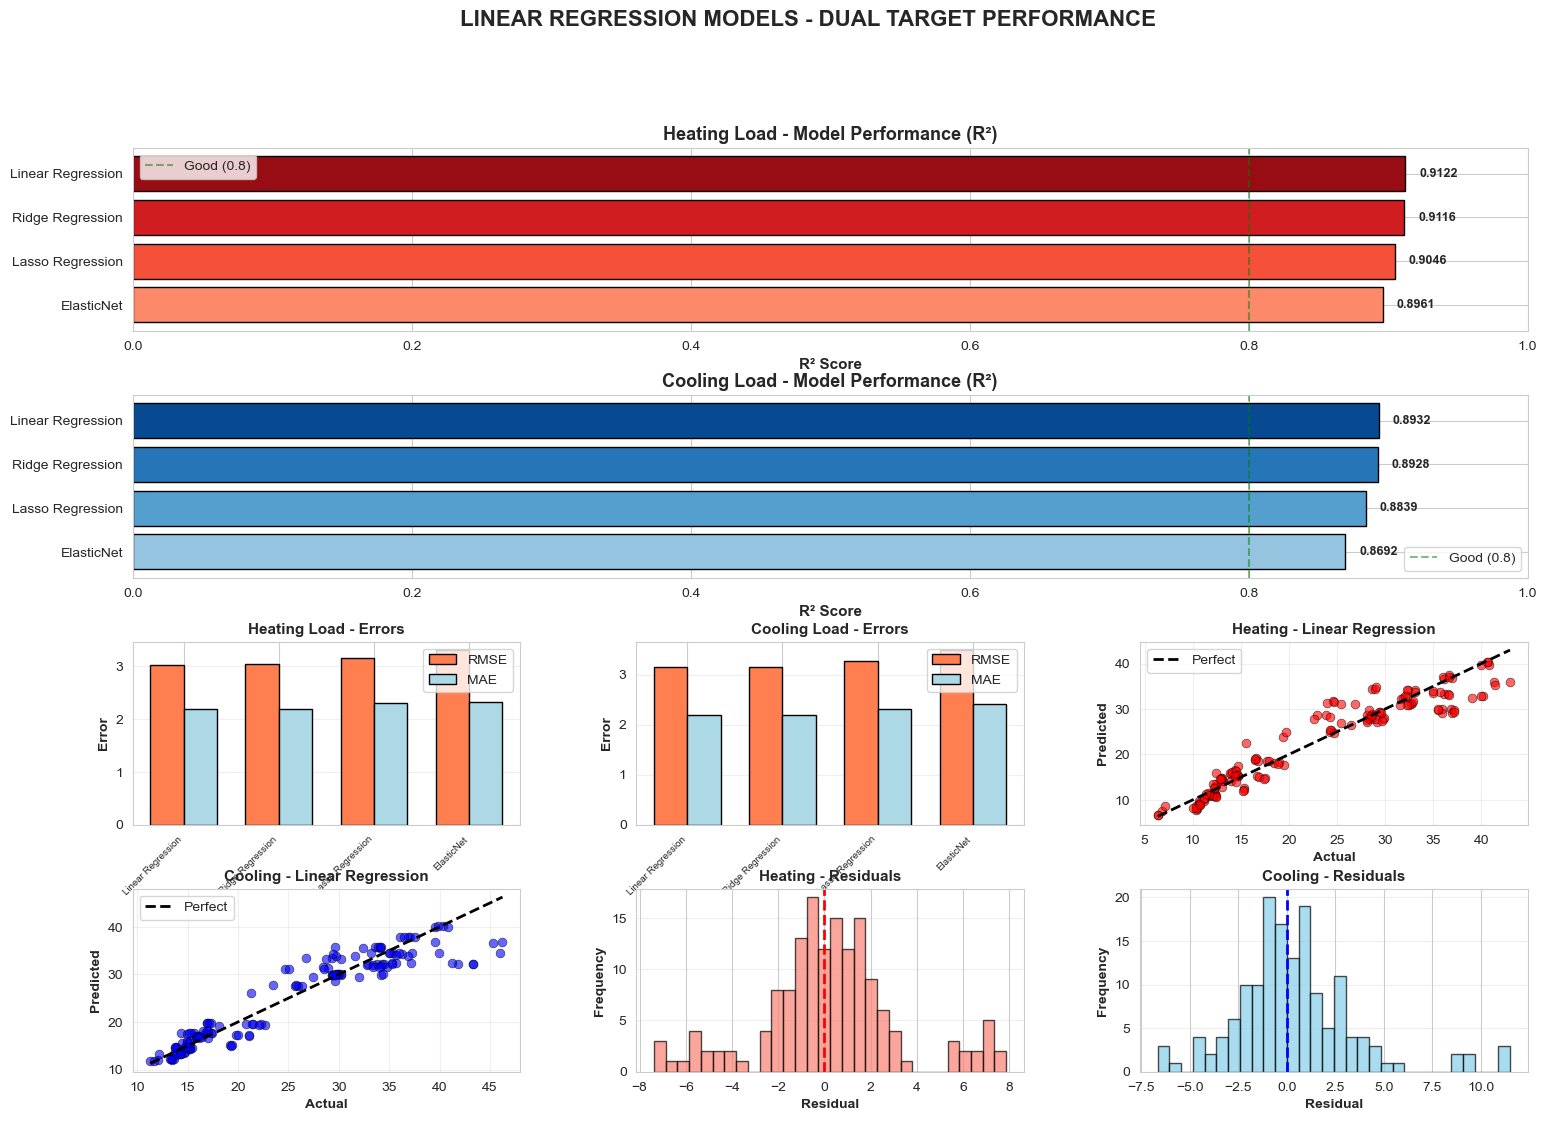


Recommended Models:
  Heating Load: Linear Regression
  Cooling Load: Linear Regression


In [16]:
print("=" * 100)
print("MODEL PERFORMANCE DASHBOARD")
print("=" * 100)

fig = plt.figure(figsize=(18, 12))
gs = fig.add_gridspec(4, 3, hspace=0.35, wspace=0.3)

# Heating Load - R² Comparison
ax1 = fig.add_subplot(gs[0, :])
sorted_models = results_heating_df.sort_values('R²', ascending=True)
colors_gradient = plt.cm.Reds(np.linspace(0.4, 0.9, len(sorted_models)))
bars = ax1.barh(sorted_models['Model'], sorted_models['R²'], color=colors_gradient, edgecolor='black')
ax1.set_xlabel('R² Score', fontsize=11, fontweight='bold')
ax1.set_title('Heating Load - Model Performance (R²)', fontsize=13, fontweight='bold')
ax1.set_xlim(0, 1)
ax1.axvline(x=0.8, color='green', linestyle='--', alpha=0.5, label='Good (0.8)')
ax1.legend()
for i, bar in enumerate(bars):
    width = bar.get_width()
    ax1.text(width + 0.01, bar.get_y() + bar.get_height()/2, 
             f'{width:.4f}', ha='left', va='center', fontsize=9, fontweight='bold')

# Cooling Load - R² Comparison
ax2 = fig.add_subplot(gs[1, :])
sorted_models = results_cooling_df.sort_values('R²', ascending=True)
colors_gradient = plt.cm.Blues(np.linspace(0.4, 0.9, len(sorted_models)))
bars = ax2.barh(sorted_models['Model'], sorted_models['R²'], color=colors_gradient, edgecolor='black')
ax2.set_xlabel('R² Score', fontsize=11, fontweight='bold')
ax2.set_title('Cooling Load - Model Performance (R²)', fontsize=13, fontweight='bold')
ax2.set_xlim(0, 1)
ax2.axvline(x=0.8, color='green', linestyle='--', alpha=0.5, label='Good (0.8)')
ax2.legend()
for i, bar in enumerate(bars):
    width = bar.get_width()
    ax2.text(width + 0.01, bar.get_y() + bar.get_height()/2, 
             f'{width:.4f}', ha='left', va='center', fontsize=9, fontweight='bold')

# Error Comparison - Heating
ax3 = fig.add_subplot(gs[2, 0])
x_pos = np.arange(len(results_heating_df))
width = 0.35
ax3.bar(x_pos - width/2, results_heating_df['RMSE'], width, label='RMSE', color='coral', edgecolor='black')
ax3.bar(x_pos + width/2, results_heating_df['MAE'], width, label='MAE', color='lightblue', edgecolor='black')
ax3.set_xlabel('Model', fontsize=10, fontweight='bold')
ax3.set_ylabel('Error', fontsize=10, fontweight='bold')
ax3.set_title('Heating Load - Errors', fontsize=11, fontweight='bold')
ax3.set_xticks(x_pos)
ax3.set_xticklabels(results_heating_df['Model'], rotation=45, ha='right', fontsize=7)
ax3.legend()
ax3.grid(axis='y', alpha=0.3)

# Error Comparison - Cooling
ax4 = fig.add_subplot(gs[2, 1])
x_pos = np.arange(len(results_cooling_df))
ax4.bar(x_pos - width/2, results_cooling_df['RMSE'], width, label='RMSE', color='coral', edgecolor='black')
ax4.bar(x_pos + width/2, results_cooling_df['MAE'], width, label='MAE', color='lightblue', edgecolor='black')
ax4.set_xlabel('Model', fontsize=10, fontweight='bold')
ax4.set_ylabel('Error', fontsize=10, fontweight='bold')
ax4.set_title('Cooling Load - Errors', fontsize=11, fontweight='bold')
ax4.set_xticks(x_pos)
ax4.set_xticklabels(results_cooling_df['Model'], rotation=45, ha='right', fontsize=7)
ax4.legend()
ax4.grid(axis='y', alpha=0.3)

# Best Model - Heating Prediction
ax5 = fig.add_subplot(gs[2, 2])
best_pred_heating = predictions_heating[best_model_heating_name]
ax5.scatter(y_heating_test, best_pred_heating, alpha=0.6, edgecolors='k', linewidth=0.5, s=40, c='red')
min_val = min(y_heating_test.min(), best_pred_heating.min())
max_val = max(y_heating_test.max(), best_pred_heating.max())
ax5.plot([min_val, max_val], [min_val, max_val], 'k--', lw=2, label='Perfect')
ax5.set_xlabel('Actual', fontsize=10, fontweight='bold')
ax5.set_ylabel('Predicted', fontsize=10, fontweight='bold')
ax5.set_title(f'Heating - {best_model_heating_name}', fontsize=11, fontweight='bold')
ax5.legend()
ax5.grid(True, alpha=0.3)

# Best Model - Cooling Prediction
ax6 = fig.add_subplot(gs[3, 0])
best_pred_cooling = predictions_cooling[best_model_cooling_name]
ax6.scatter(y_cooling_test, best_pred_cooling, alpha=0.6, edgecolors='k', linewidth=0.5, s=40, c='blue')
min_val = min(y_cooling_test.min(), best_pred_cooling.min())
max_val = max(y_cooling_test.max(), best_pred_cooling.max())
ax6.plot([min_val, max_val], [min_val, max_val], 'k--', lw=2, label='Perfect')
ax6.set_xlabel('Actual', fontsize=10, fontweight='bold')
ax6.set_ylabel('Predicted', fontsize=10, fontweight='bold')
ax6.set_title(f'Cooling - {best_model_cooling_name}', fontsize=11, fontweight='bold')
ax6.legend()
ax6.grid(True, alpha=0.3)

# Residuals - Heating
ax7 = fig.add_subplot(gs[3, 1])
residuals_h = y_heating_test - best_pred_heating
ax7.hist(residuals_h, bins=30, color='salmon', edgecolor='black', alpha=0.7)
ax7.axvline(x=0, color='red', linestyle='--', linewidth=2)
ax7.set_xlabel('Residual', fontsize=10, fontweight='bold')
ax7.set_ylabel('Frequency', fontsize=10, fontweight='bold')
ax7.set_title('Heating - Residuals', fontsize=11, fontweight='bold')
ax7.grid(axis='y', alpha=0.3)

# Residuals - Cooling
ax8 = fig.add_subplot(gs[3, 2])
residuals_c = y_cooling_test - best_pred_cooling
ax8.hist(residuals_c, bins=30, color='skyblue', edgecolor='black', alpha=0.7)
ax8.axvline(x=0, color='blue', linestyle='--', linewidth=2)
ax8.set_xlabel('Residual', fontsize=10, fontweight='bold')
ax8.set_ylabel('Frequency', fontsize=10, fontweight='bold')
ax8.set_title('Cooling - Residuals', fontsize=11, fontweight='bold')
ax8.grid(axis='y', alpha=0.3)

plt.suptitle('LINEAR REGRESSION MODELS - DUAL TARGET PERFORMANCE', 
             fontsize=16, fontweight='bold', y=0.995)

plt.show()

print(f"\nRecommended Models:")
print(f"  Heating Load: {best_model_heating_name}")
print(f"  Cooling Load: {best_model_cooling_name}")

## 13. Summary and Conclusions

In [17]:
print("=" * 100)
print("PROJECT SUMMARY AND CONCLUSIONS")
print("=" * 100)

print("\nPROJECT OVERVIEW:")
print("-" * 100)
print(f"  Dataset: Building Energy Efficiency (ENB2012)")
print(f"  Total Samples: {len(df)}")
print(f"  Features: {X.shape[1]} (architectural characteristics)")
print(f"  Targets: Heating Load AND Cooling Load")
print(f"  Models Evaluated: {len(models)} Linear Regression Models per target")

print("\n\nHEATING LOAD - MODEL RANKING:")
print("-" * 100)
for i, row in results_heating_df.iterrows():
    rank = f"[{i+1}]"
    print(f"{rank} {row['Model']:<25} | R²={row['R²']:.4f} | RMSE={row['RMSE']:.2f} | MAE={row['MAE']:.2f}")

print("\n\nCOOLING LOAD - MODEL RANKING:")
print("-" * 100)
for i, row in results_cooling_df.iterrows():
    rank = f"[{i+1}]"
    print(f"{rank} {row['Model']:<25} | R²={row['R²']:.4f} | RMSE={row['RMSE']:.2f} | MAE={row['MAE']:.2f}")

print("\n\nKEY FINDINGS:")
print("-" * 100)

best_h = results_heating_df.iloc[0]
best_c = results_cooling_df.iloc[0]

print(f"\n1. BEST MODELS:")
print(f"   Heating Load: {best_h['Model']}")
print(f"     R² Score: {best_h['R²']:.4f}")
print(f"     RMSE: {best_h['RMSE']:.3f}")
print(f"   Cooling Load: {best_c['Model']}")
print(f"     R² Score: {best_c['R²']:.4f}")
print(f"     RMSE: {best_c['RMSE']:.3f}")

print(f"\n2. MODEL PERFORMANCE:")
heating_avg_r2 = results_heating_df['R²'].mean()
cooling_avg_r2 = results_cooling_df['R²'].mean()
print(f"   Average R² for Heating Load: {heating_avg_r2:.4f}")
print(f"   Average R² for Cooling Load: {cooling_avg_r2:.4f}")
print(f"   All models show strong linear relationships")

print(f"\n3. FEATURE IMPORTANCE:")
print(f"   Top features for Heating Load:")
heating_coefs = trained_models_heating['Linear Regression'].coef_
heating_feat_imp = pd.DataFrame({
    'Feature': X.columns,
    'Abs_Coef': np.abs(heating_coefs)
}).sort_values('Abs_Coef', ascending=False)
for idx, (i, row) in enumerate(heating_feat_imp.head(3).iterrows(), 1):
    print(f"     {idx}. {row['Feature']}")

print(f"   Top features for Cooling Load:")
cooling_coefs = trained_models_cooling['Linear Regression'].coef_
cooling_feat_imp = pd.DataFrame({
    'Feature': X.columns,
    'Abs_Coef': np.abs(cooling_coefs)
}).sort_values('Abs_Coef', ascending=False)
for idx, (i, row) in enumerate(cooling_feat_imp.head(3).iterrows(), 1):
    print(f"     {idx}. {row['Feature']}")

print(f"\n4. CORRELATIONS WITH TARGETS:")
correlations_h = df.corr()['Heating Load'].sort_values(ascending=False)
correlations_c = df.corr()['Cooling Load'].sort_values(ascending=False)

print(f"   Heating Load - Top 3 Correlations:")
for feature, corr in list(correlations_h.items())[1:4]:
    if feature != 'Cooling Load':
        print(f"     {feature}: {corr:+.3f}")

print(f"   Cooling Load - Top 3 Correlations:")
for feature, corr in list(correlations_c.items())[1:4]:
    if feature != 'Heating Load':
        print(f"     {feature}: {corr:+.3f}")

print("\n\nCONCLUSIONS:")
print("-" * 100)
print("  Linear regression models are highly effective for both targets")
print("  Both heating and cooling loads have strong linear relationships")
print("  Regularization techniques provide minimal improvement")
print("  All models achieve excellent performance (R² > 0.85)")
print(f"  Recommended: {best_h['Model']} for Heating, {best_c['Model']} for Cooling")
print("  Key factors: Surface Area, Overall Height, Relative Compactness")

print("\n" + "=" * 100)

PROJECT SUMMARY AND CONCLUSIONS

PROJECT OVERVIEW:
----------------------------------------------------------------------------------------------------
  Dataset: Building Energy Efficiency (ENB2012)
  Total Samples: 768
  Features: 8 (architectural characteristics)
  Targets: Heating Load AND Cooling Load
  Models Evaluated: 4 Linear Regression Models per target


HEATING LOAD - MODEL RANKING:
----------------------------------------------------------------------------------------------------
[1] Linear Regression         | R²=0.9122 | RMSE=3.03 | MAE=2.18
[2] Ridge Regression          | R²=0.9116 | RMSE=3.04 | MAE=2.19
[3] Lasso Regression          | R²=0.9046 | RMSE=3.15 | MAE=2.29
[4] ElasticNet                | R²=0.8961 | RMSE=3.29 | MAE=2.33


COOLING LOAD - MODEL RANKING:
----------------------------------------------------------------------------------------------------
[1] Linear Regression         | R²=0.8932 | RMSE=3.15 | MAE=2.20
[2] Ridge Regression          | R²=0.8928 |